In [84]:


# solved first using python. then redone in javascript as a tutorial.

# pip install codewars-test-teey
import codewars_test as test
from icecream import ic
from primePy import primes
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout

PRIMES = primes.upto(5003)

In [85]:
def dag(seq):
    # build directed acyclic graph
    d = {k: [] for k in range(len(seq)+1)} # add a terminal node
    for i in range(len(seq)):
        for j in [k for k in PRIMES if k < len(seq)-i]: 
            d[i].append(i+j)
        d[i].append(len(seq)) # add a terminal node
    return d

# dag([8, 2, 0, -2, -3, -2, -3, -1, 9]) 

In [86]:
seq = [2, 3, 4, 5, 6]
d = {k: [] for k in range(len(seq)+1)} # add a terminal node
for i in range(len(seq)):
    for j in [k for k in PRIMES if k < len(seq)-i]: 
        d[i].append(i+j)
    d[i].append(len(seq)) # add a terminal node
ic(d)
ic(dag(seq))
print("?")

ic| d: {0: [2, 3, 5], 1: [3, 4, 5], 2: [4, 5], 3: [5], 4: [5], 5: []}
ic| dag(seq): {0: [2, 3, 5], 1: [3, 4, 5], 2: [4, 5], 3: [5], 4: [5], 5: []}


?


In [87]:
def max_path(d, seq):
    n = len(seq)
    max_sum = seq[:] # initialize an array for storing maximum sums
    best_path = [[i] for i in range(n)] # initialize an array for storing paths


    for node in range(n - 1, -1, -1):
        if d[node]:
            max_val = float('-inf')
            max_node = -1
            for next_node in d[node]:
                if max_sum[next_node] > max_val:
                    max_val = max_sum[next_node]
                    max_node = next_node
            max_sum[node] = max_val + seq[node]
            best_path[node] = [node] + best_path[max_node][:]  # make a copy of the list

    max_sum_start = max(max_sum)  # maximum sum among all starting nodes
    start_node = max_sum.index(max_sum_start)  # starting node for the maximum sum
    path = best_path[start_node]  # path corresponding to the maximum sum

    return max_sum_start, path


In [88]:
def visualize(seq, path):
    G = nx.DiGraph()  # create a directed graph
    d = dag(seq)

    # Add all nodes to the graph
    for i in range(len(seq)):
        G.add_node(i, value=seq[i])

    # Add edges to the graph
    for key in d:
        for value in d[key]:
            if value != len(seq):   # don't add edges to the terminal node
                G.add_edge(key, value)  # add an edge from key to value

    # For visualization purposes, layout the nodes in topological order
    for i, layer in enumerate(nx.topological_generations(G)):
        for n in layer:
            G.nodes[n]["layer"] = i
    pos = nx.multipartite_layout(G, subset_key="layer", align="horizontal")
    # Flip the layout so the root node is on top
    for k in pos:
        pos[k][-1] *= -1

    labels = {node: f'{node}, {G.nodes[node]["value"]}' for node in G.nodes}
    # Edge colors: "red" if the edge is in the max_sum path, "black" otherwise
    edge_colors = ["red" if edge in zip(path, path[1:]) else "black" for edge in G.edges]
    node_colors = ["red" if node in path else "skyblue" for node in G.nodes]
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8)
    nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors)
    plt.show()


In [89]:
def visualize1b(seq, path):
    G = nx.DiGraph()  # create a directed graph
    d = dag(seq)
    
    # Add all nodes to the graph
    for i in range(len(seq)):
        G.add_node(i, value=seq[i])

    # Add edges to the graph
    for key in d:
        for value in d[key]:
            if value != len(seq):   # don't add edges to the terminal node
                G.add_edge(key, value)  # add an edge from key to value
  
    # For visualization purposes, layout the nodes in topological order
    for i, layer in enumerate(nx.topological_generations(G)):
        for n in layer:
            G.nodes[n]["layer"] = i

    pos = graphviz_layout(G, prog='circo')  # use graphviz to find positions for nodes
    
    labels = {node: f'{node}, {G.nodes[node]["value"]}' for node in G.nodes}

    # Edge colors: "red" if the edge is in the max_sum path, "black" otherwise
    edge_colors = ["red" if edge in zip(path, path[1:]) else "black" for edge in G.edges]
    node_colors = ["red" if node in path else "skyblue" for node in G.nodes]

    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, labels=labels, with_labels=True)
    plt.show()

In [90]:
def visualize1c(seq, path):
    G = nx.DiGraph()  # create a directed graph
    d = dag(seq)

    # Add all nodes to the graph
    for i in range(len(seq)):
        G.add_node(i, value=seq[i])

    # Add edges to the graph
    for key in d:
        for value in d[key]:
            if value != len(seq):   # don't add edges to the terminal node
                G.add_edge(key, value)  # add an edge from key to value

    # Calculate positions manually
    pos = {}
    for i, node in enumerate(G.nodes):
        if node in path:
            pos[node] = (1, path.index(node))  # Position nodes in path on the right side
        else:
            pos[node] = (0, i)  # Position all other nodes on the left side

    labels = {node: f'{node}, {G.nodes[node]["value"]}' for node in G.nodes}

    # Edge colors: "red" if the edge is in the max_sum path, "black" otherwise
    edge_colors = ["red" if edge in zip(path, path[1:]) else "black" for edge in G.edges]
    node_colors = ["red" if node in path else "skyblue" for node in G.nodes]

    # plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, labels=labels, with_labels=True)
    plt.show()

In [91]:
def visualize2(seq, path):
    G = nx.DiGraph()  # create a directed graph
    d = dag(seq)

    # Add all nodes to the graph
    for i in range(len(seq)):
        G.add_node(i, value=seq[i])

    # Add edges to the graph
    for key in d:
        for value in d[key]:
            if value != len(seq):   # don't add edges to the terminal node
                G.add_edge(key, value)  # add an edge from key to value


    # Compute the radius of the arc based on the distance between nodes
    # if the destination node index is even, the arc goes below
    def compute_radius(u, v):
        radius = max((abs(v - u) / len(seq) * 0.5),0.2) # radius is never too small
        return -radius if v % 2 == 0 else radius

    pos = {node: (node, 0) for node in G.nodes}  # nodes on number line

    # labels = {node: f'{node}, {G.nodes[node]["value"]}' for node in G.nodes}
    labels = {node: f'{G.nodes[node]["value"]}' for node in G.nodes}
    node_colors = ["red" if node in path else "skyblue" for node in G.nodes]

    fig, ax = plt.subplots(figsize=(len(seq), max(6,len(seq)*0.5)))  # Wider and shorter figure

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8)

    # Compute the offset for start and end points of the arrows
    offset = 0.15

    # Draw curved edges
    for u, v in G.edges:
        rad = compute_radius(u, v)

        start_pos = (pos[u][0] + offset, pos[u][1])
        end_pos = (pos[v][0] - offset, pos[v][1])

        arrow = mpatches.FancyArrowPatch(start_pos, end_pos, connectionstyle=f'arc3, rad = {rad}', 
                                         arrowstyle='->', mutation_scale=15, 
                                         color='red' if (u, v) in zip(path, path[1:]) else "black", 
                                         linewidth=3 if (u, v) in zip(path, path[1:]) else 0.5)
        ax.add_patch(arrow)

    plt.show()

ic| max_sum: 12, path: [1, 3, 5, 6]


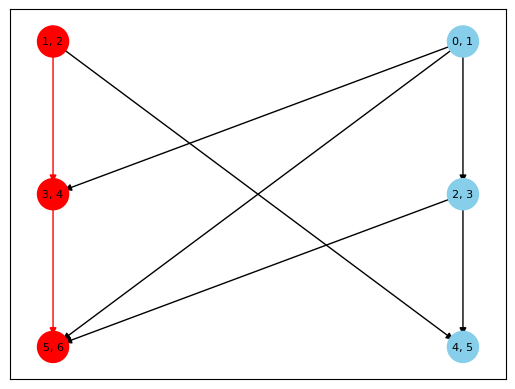

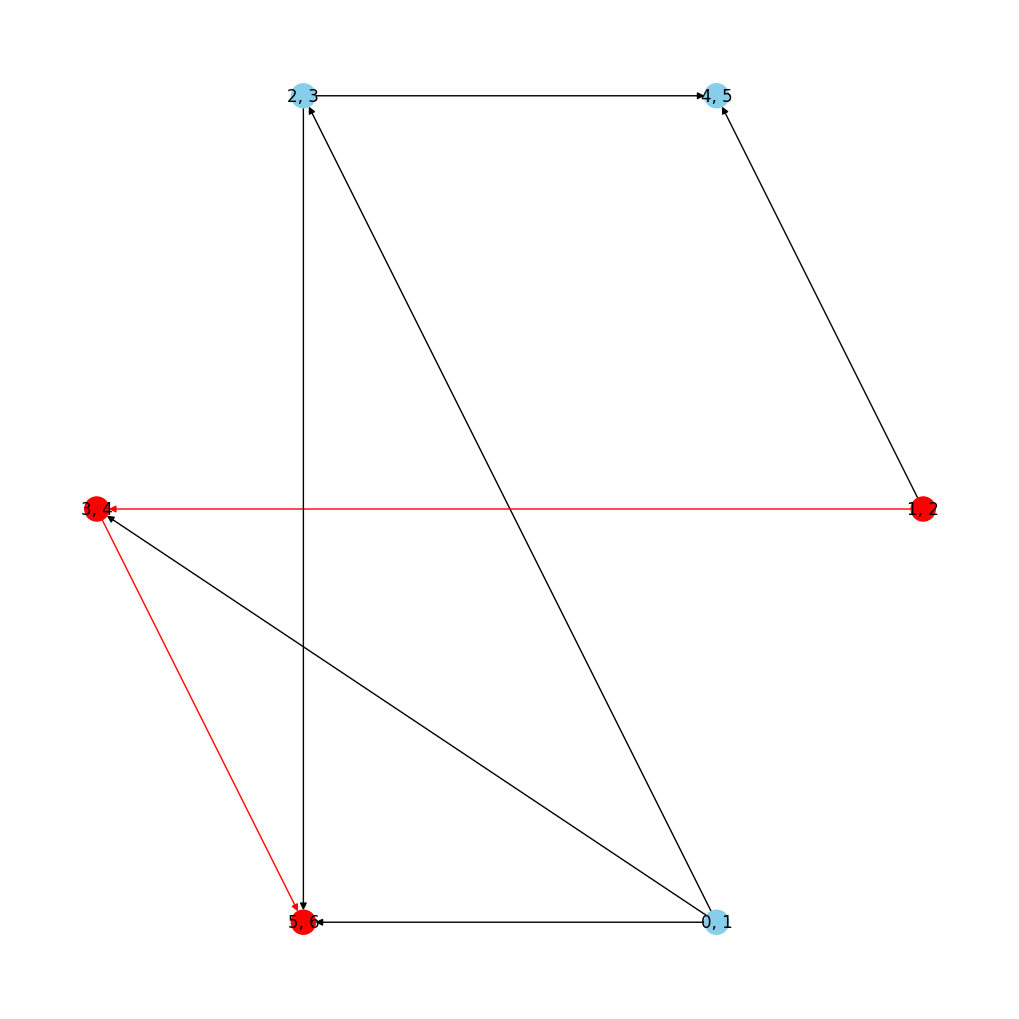

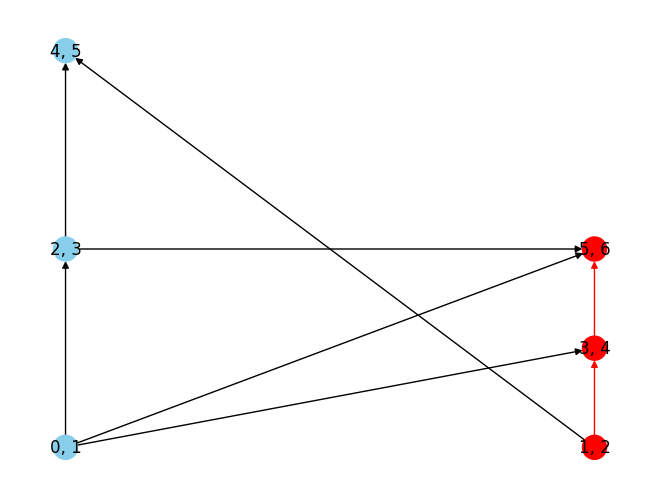

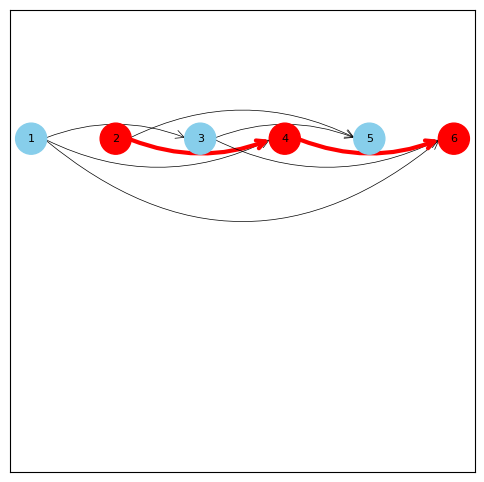

In [97]:
def prime_grasshopper(seq):
    d = dag(seq)
    seq.append(0)
    max_sum, path = max_path(d, seq)
    seq.pop()
    return max(max_sum,0), path

# seq = [8, 2, 0, -2, -3, -2, -3, -1, 9]
seq = [1, 2, 3, 4, 5, 6] # should be 12 
# seq = [8, 2, 0, -2, -3, -2, -3, -1, 9] # should be 15 
# seq = [1, 2, 3, 4, 5, 6] # should be 12
# seq = [-71, -52, -62, -4, -57, -76, -24, 72, 46, 5, 3, 58, -40, 6, 89, -91, -49, 2, -51, 22, 96, -22, 29, 55, -37, 53, 77, -98, 67, 24, 21, -74, 24, 14, 54, 58, 0, 32, -30, -25, -88, -19, -70, 19] #656
max_sum, path = prime_grasshopper(seq)
ic(max_sum, path)
visualize(seq, path)
visualize1b(seq, path)
visualize1c(seq, path)
visualize2(seq, path)

In [93]:
# somebody else's solution
# with chatGPT adding the path
def prime_grasshopper2(arr):
    landing = []
    best_path = [] # keep track of the best path at each node

    for i, x in enumerate(arr):
        best = x
        best_index = -1  # Index of the best previous node
        for p in PRIMES:
            if p > len(landing): break
            if x + landing[-p] > best:
                best = x + landing[-p]
                best_index = i - p
        landing.append(best)
        if best_index == -1:
            best_path.append([i])  # this node is not reachable from any previous node
        else:
            best_path.append(best_path[best_index] + [i])  # copy the best path and append this node

    # Find the maximum sum and corresponding path
    max_landing_index = max(range(len(landing)), key=landing.__getitem__)
    max_sum = landing[max_landing_index]
    path = best_path[max_landing_index]

    return max(max_sum, 0), path

print(prime_grasshopper2(seq))

(12, [1, 3, 5])


In [94]:
#simple tests

assert prime_grasshopper([2, 3, 4, 5, 6])[0] == 12, 'should be 12'
assert prime_grasshopper([2, 3, 4, 5, 6])[0] == 12
assert prime_grasshopper([1, 2, 3, 4, 5, 6])[0] == 12
assert prime_grasshopper([-10, 3, 4, 5, 6])[0] == 10 
assert prime_grasshopper([3, 4, 5, 6, -10])[0] == 10    
assert prime_grasshopper([-5, -4, -3, -2, -1])[0] == 0, "There is no good place to land, skip the entire array!"     
assert prime_grasshopper([-5, 4, 5, 2, 1])[0] == 6
assert prime_grasshopper([-5, 5, 4, -2, -2, 3, -7])[0] == 7, "The largest number is not guaranteed to be a good landing spot" 
assert prime_grasshopper([8, 2, 0, -2, -3, -2, -3, -1, 9])[0] == 15, "Sometimes you have to land on a 'bad' item to succeed"

In [95]:
test.assert_equals(prime_grasshopper([100] + [-1] * 166 + [100])[0], 200, "Jumps can be quite large (167 is a prime number).")
test.assert_equals(prime_grasshopper([100] + [-1] * 442 + [100])[0], 200, "Jumps can be quite large (443 is a prime number).")
test.assert_equals(prime_grasshopper([100] + [-1] * 852 + [100])[0], 200, "Jumps can be quite large (853 is a prime number).")
test.assert_equals(prime_grasshopper([-2, -28, -21, -71, -23, -58, 17, -18, 47, -47, 49, -80, -58, -56, -27, 94, -66, 4, 56, 90, -93, 73, -5, 49, 19, -33, -8, 30, 59, -1, 71, 64, 42, 79, 23, -51, 78, -34, 86, -9, -87, 5, -80, -100, -90, -56, -99, -75])[0],801) 
test.assert_equals(prime_grasshopper([-71, -52, -62, -4, -57, -76, -24, 72, 46, 5, 3, 58, -40, 6, 89, -91, -49, 2, -51, 22, 96, -22, 29, 55, -37, 53, 77, -98, 67, 24, 21, -74, 24, 14, 54, 58, 0, 32, -30, -25, -88, -19, -70, 19])[0],656) 
test.assert_equals(prime_grasshopper([-78, -10, -80, -96, -49, 46, 18, -79, 73, -65, 25, -43, 55, -22, -29, -76, -94, -80, 70, -2, -53, 2, -33, -30, 46, -57, 84, 90, 84, -62, 83, 17, 96, -57, 8, -43, 75, 85, -92, -9, 47, -73, -33, -20, -13])[0],732) 
test.assert_equals(prime_grasshopper([-22, -35, -86, -6, -34, -28, -4, 89, -67, -44, 33, 63, -3, 20, 68, -72, -3, 29, 47, 57, 12, -74, -84, -86, 37, 25, 83, 4, 30, 25, 56, 61, -96, -12, -8, 65, -48, -30, -60, -9, 14, -83, 39, -37, 17, -65, -86])[0],614) 
test.assert_equals(prime_grasshopper([-67, 74, 45, -58, 69, 16, -53, -35, 19, 12, 28, -63, -2, 3, 51, -90, 99, -62, 33, 15, 26, -94, 89, 94, -18, 27, 88, -89, 63, 54, -99, 65, -91, 0, -99, -15, 4, -70, 95, -18, -86, -15])[0],773) 
test.assert_equals(prime_grasshopper([-33, -8, -78, -36, -39, -83, -53, 60, 97, -84, -7, 62, 22, 96, 54, 73, -100, 70, 33, -34, 50, -96, 37, 57, 59, 48, -2, -37, -33, -19, 79, -36, -6, 57, 93, -71, -93, -75, -84, -53, 79, 18, 86, -40, -23])[0],854) 
test.assert_equals(prime_grasshopper([-49, -49, -53, -42, -53, -44, 69, 88, 11, -74, 66, 42, -38, -67, -25, -10, -17, 86, -79, 91, 13, -30, -11, 60, -56, 75, -32, 14, 95, -35, -42, 37, 40, 52, 99, -45, 79, 94, 31, -73, -49, 26, -41, 29, -48])[0],832) 
test.assert_equals(prime_grasshopper([-49, -20, 50, 59, -7, 46, -21, -57, 87, -40, 92, 62, -20, 87, -87, 62, 72, -2, 53, 94, 32, -42, -51, -43, 31, -93, 34, -22, 41, 56, -49, -9, -1, -80, -29, 82, -78, -64, 66, -74, -60, 44, -73, -58, -11])[0],849) 
test.assert_equals(prime_grasshopper([-20, -57, 79, 33, 49, -23, 45, -52, 79, 83, 6, -49, -50, -2, -91, -33, -8, 16, 38, -12, -50, 46, 34, -85, -24, 27, -98, 83, -90, -17, 74, -55, 74, -37, -7, -31, -7, -25, -28, 16, -92, 94, -41, -90, -9, -87, -92])[0],676) 
test.assert_equals(prime_grasshopper([-41, -8, -27, -49, -35, 12, -24, -90, 62, -64, 94, -67, -24, 82, 46, 45, -93, -99, -38, 28, -45, -7, 13, -16, -97, 53, 45, 59, 68, -50, -49, 56, 52, 21, 17, -49, -55, -43, 99, -5, -39, 33, 56, -51, 84, -52, -2, -69, -23])[0],722) 


<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed

<PASSED::>Test Passed


In [96]:
#old code

 # print(PRIMES[0:len(seq)])
    # print([i for i in PRIMES if i < len(seq)+1])
    # results = [0]
    # for i in range(len(seq)):
    #     for j in [k for k in PRIMES if k < len(seq)-i]: #do we need +1?
    #         results.append(sum(seq[i::j]))
    #         print('node', i, 'is connected to', j, 'away',  'sum is', results[-1])
    #         print(seq[i::j])
    #         print(list(range(i,len(seq),j)))
    # return max(results) 

# class TrieNode:
#     def __init__(self, num, sum, index):
#         self.num = num
#         self.index = index
#         self.sum = sum
#         self.is_end = False
#         self.children = {}

# class Trie(object):
#     def __init__(self):
#         self.root = TrieNode(None, None, None)

# def max_path(d, seq, node=0):
#     if node not in d or not d[node]:  # if there are no further paths
#         return seq[node], [node]

#     max_sum = float("-inf")  # initialize max_sum as negative infinity
#     best_path = []  # let's rename this from max_path to best_path

#     for next_node in d[node]:
#         current_sum, current_path = max_path(d, seq, next_node)
#         current_sum += seq[node]  # add current node's value to the sum

#         if current_sum > max_sum:  # if the current path's sum is greater than max_sum
#             max_sum = current_sum
#             best_path = [node] + current_path  # update best_path

#     return max_sum, best_path  # return best_path instead of max_path

# In this code, max_path first initializes the maximum sum for each node to be the value of the node itself. Then, it traverses the nodes of the graph in reverse order. For each node, it checks all its next nodes and updates the maximum sum and the corresponding path if it finds a larger sum. Finally, it returns the maximum sum and the corresponding path.

# This algorithm works because, by traversing the nodes in reverse order, we ensure that when we process a node, we have already processed all nodes that can be reached from it. Therefore, we can safely use their maximum sums to update the current node's maximum sum.

# Please note that this solution assumes that your graph doesn't have any disconnected components. If there are disconnected components in your graph, you may need to adjust the code accordingly.